In [1]:
# Question 1 - Import and Explore Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler

os.chdir('C:\\Users\\micha\\Documents\\DAAN862')

seeds = pd.read_csv('seeds_dataset.csv')
display(seeds)

# As we can see, the csv file doesn't have column names
# lets fix that

colnames = ['Area', 'Perimeter', 'Compactness', 'Kernel Length',
            'Kernel Width', 'Asymmetry', 'Groove Length', 'Species']

seeds = pd.read_csv('seeds_dataset.csv', names=colnames)
display(seeds)

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
...,...,...,...,...,...,...,...,...
204,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
205,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
206,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
207,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry,Groove Length,Species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [2]:
# Question 1 Cont - Explore data
display(seeds.describe())
display(seeds.corr())

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry,Groove Length,Species
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry,Groove Length,Species
Area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
Perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
Compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
Kernel Length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
Kernel Width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
Asymmetry,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
Groove Length,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
Species,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [58]:
# Question 2 - Use K-Means Clustering to Group

# First, convert to scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(seeds.iloc[:, 0:7])
y = seeds.Species

In [61]:
# K-Means, set n_clusters to 3 since we have 3 known species
kmeans = KMeans(n_clusters=3, random_state=100, n_init=10)
y_pred = kmeans.fit_predict(X)

In [88]:
# Print Scores
print('Homogenity:    ', metrics.homogeneity_score(y, y_pred))
print('Completeness:  ', metrics.completeness_score(y, y_pred))
print('Adjusted Rand: ', metrics.adjusted_rand_score(y, y_pred))
print('Silhouette:    ', metrics.silhouette_score(X, y_pred, metric='euclidean'))

Homogenity:     0.6734021033886654
Completeness:   0.6751899081752645
Adjusted Rand:  0.7048605249026285
Silhouette:     0.4221052568124793


In [63]:
centers = kmeans.cluster_centers_

In [89]:
print(centers)

# For example, we can view clusters in the form of scatter plots
# We will experiment with Area and Asymmetry
c_area = centers[:, 0]
c_asymm = centers[:, 5]

[[0.75733298 0.79374354 0.69419238 0.73003765 0.76950062 0.36757645
  0.75709318]
 [0.1233337  0.17513685 0.37817899 0.18671025 0.16252742 0.49856915
  0.27928792]
 [0.38349003 0.4198407  0.67120387 0.36468534 0.46849918 0.26417688
  0.31838389]]


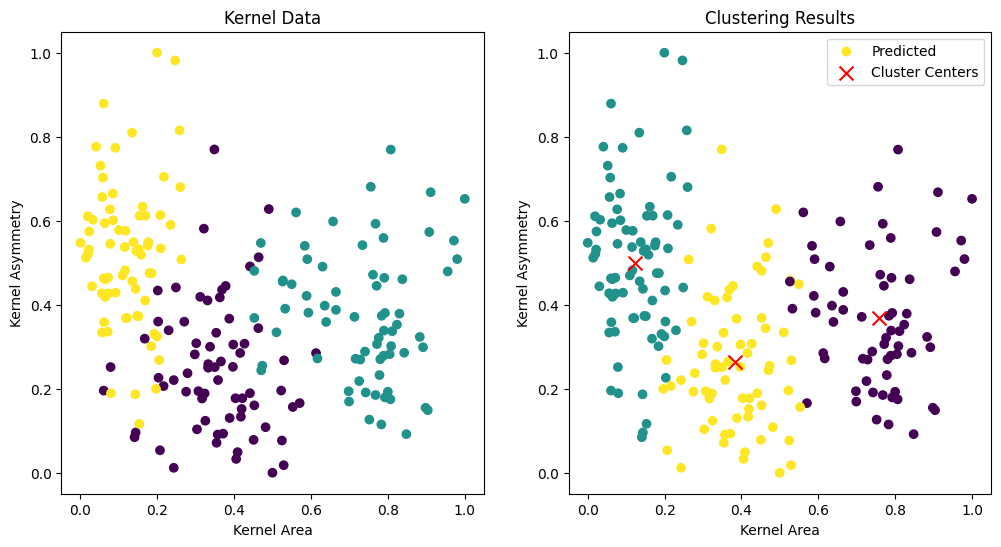

In [91]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 5], c=y)
plt.title('Kernel Data')
plt.xlabel('Kernel Area')
plt.ylabel('Kernel Asymmetry')
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 5], c=y_pred, label='Predicted')
plt.scatter(c_area, c_asymm, s=100, c='r', marker='x', 
            label='Cluster Centers')
plt.title('Clustering Results')
plt.xlabel('Kernel Area')
plt.ylabel('Kernel Asymmetry')
plt.legend()
plt.subplots_adjust(wspace=0.2)

In [65]:
# Question 3 - Use different linkage types for Hierarchical Clustering
#              Which returns the best results?

# Start by creating three different models, one for each linkage
Hier_y_predavg = AgglomerativeClustering(n_clusters=3,
                                      metric='euclidean',
                                      linkage='average'
                                      ).fit_predict(X)

Hier_y_predward = AgglomerativeClustering(n_clusters=3,
                                      metric='euclidean',
                                      linkage='ward'
                                      ).fit_predict(X)

Hier_y_predcmp = AgglomerativeClustering(n_clusters=3,
                                      metric='euclidean',
                                      linkage='complete'
                                      ).fit_predict(X)

In [92]:
# We can return the scores for each model and visually compare the results

# Average Results
print('Homogenity:    ', metrics.homogeneity_score(y, Hier_y_predavg))
print('Completeness:  ', metrics.completeness_score(y, Hier_y_predavg))
print('Adjusted Rand: ', metrics.adjusted_rand_score(y, Hier_y_predavg))
print('Silhouette:    ', metrics.silhouette_score(X, Hier_y_predavg, metric='euclidean'))

Homogenity:     0.7016719692947548
Completeness:   0.7098244492986717
Adjusted Rand:  0.7247242716839253
Silhouette:     0.39437476201792854


In [93]:
# Ward Results
print('Homogenity:    ', metrics.homogeneity_score(y, Hier_y_predward))
print('Completeness:  ', metrics.completeness_score(y, Hier_y_predward))
print('Adjusted Rand: ', metrics.adjusted_rand_score(y, Hier_y_predward))
print('Silhouette:    ', metrics.silhouette_score(X, Hier_y_predward, metric='euclidean'))

Homogenity:     0.6825990188762132
Completeness:   0.6975309670281451
Adjusted Rand:  0.6752090091502835
Silhouette:     0.38103690313150723


In [94]:
# Complete Results
print('Homogenity:    ', metrics.homogeneity_score(y, Hier_y_predcmp))
print('Completeness:  ', metrics.completeness_score(y, Hier_y_predcmp))
print('Adjusted Rand: ', metrics.adjusted_rand_score(y, Hier_y_predcmp))
print('Silhouette:    ', metrics.silhouette_score(X, Hier_y_predcmp, metric='euclidean'))

# As a result, we see that a linkage of Average works the best for this dataset since each
# metric returned is higer than the others. 

Homogenity:     0.6088174496902253
Completeness:   0.6356867819968337
Adjusted Rand:  0.5663819104900444
Silhouette:     0.3637982100400148


In [95]:
# Question 4 - Use DBSCAN to group, then determine the best parameters

# Create a baseline model using eps=0.2 and min_samples=5
db_y_pred = DBSCAN(eps=0.2, min_samples=5).fit_predict(X)

# Results
print('Homogenity:    ', metrics.homogeneity_score(y, db_y_pred))
print('Completeness:  ', metrics.completeness_score(y, db_y_pred))
print('Adjusted Rand: ', metrics.adjusted_rand_score(y, db_y_pred))
print('Silhouette:    ', metrics.silhouette_score(X, db_y_pred, metric='euclidean'))

Homogenity:     0.46420339686042006
Completeness:   0.45920866716064307
Adjusted Rand:  0.3838628158674018
Silhouette:     0.07937304141396345


In [97]:
# Now, we will have to manually build models without GridSearchCV 
# to determine the best combiniation.
result = []

# Some fine-tuning for this dataset was needed to get a reasonable
# range of parameters. In some cases, not enough unique labels were
# created to calculate silhouette scores
eps = [ 0.15, 0.2, 0.25, 0.3]
min_samples = range(1, 6)

# Loop through the ranges for each combo
for i in eps:
    for j in min_samples:
        print(i, j)
        model = DBSCAN(eps=i, min_samples=j)
        y_pred_tmp = model.fit_predict(X)
        n_clusters = np.unique(model.labels_).size
        score_silh = metrics.silhouette_score(X, y_pred_tmp, metric='euclidean')
        score_homogen = metrics.homogeneity_score(y, y_pred_tmp)
        # Store parameters in array
        result.append((i, j, score_homogen, score_silh, n_clusters))


0.15 1
0.15 2
0.15 3
0.15 4
0.15 5
0.2 1
0.2 2
0.2 3
0.2 4
0.2 5
0.25 1
0.25 2
0.25 3
0.25 4
0.25 5
0.3 1
0.3 2
0.3 3
0.3 4
0.3 5


In [98]:
result

# Here, we can visually compare the results and see that, depending on
# exactly which parameters are desired, a few combos work best. It appears
# that an eps=0.2 and min_samples=3 returns the best overall, however higher
# homogenity scores can be observed in other combos but silhouette seems to 
# represent the data best so higher weight can be used where a max of silhouette 
# score = 0.2617 is likely the best option. 

[(0.15, 1, 0.9255232183107535, -0.0871698967953067, 69),
 (0.15, 2, 0.6894569537774907, -0.04282907075552252, 17),
 (0.15, 3, 0.6125502269887075, -0.012462484626016769, 9),
 (0.15, 4, 0.5256031865067574, -0.03580746776673375, 7),
 (0.15, 5, 0.4879447754470833, -0.10715870147039122, 6),
 (0.2, 1, 0.5529681063967011, -0.21038821557148724, 21),
 (0.2, 2, 0.5023597544660977, -0.0817995385341649, 9),
 (0.2, 3, 0.4547114189227929, 0.26171136966927827, 4),
 (0.2, 4, 0.46944691568813113, 0.22699171653861017, 4),
 (0.2, 5, 0.46420339686042006, 0.07937304141396345, 5),
 (0.25, 1, 0.04292183887880707, -0.36953735268320786, 9),
 (0.25, 2, 0.02220151404281519, -0.025705362437131674, 3),
 (0.25, 3, 0.0015375414298288298, 0.10738522563893668, 2),
 (0.25, 4, 0.0015375414298288298, 0.10738522563893668, 2),
 (0.25, 5, 0.0031411019151860982, 0.10858172504060049, 2),
 (0.3, 1, 0.010854655624153458, -0.05048803705545211, 3),
 (0.3, 2, 0.010854655624153458, -0.05048803705545211, 3),
 (0.3, 3, 0.010854655624

In [74]:
# An additional exercise is to see if reducing the number of attributes 
# helps tune some of results. We will rmeove 2 attributes that had the
# lowest correlation to y
X_reduced = scaler.fit_transform(seeds.iloc[:, [0, 1, 2, 4, 5]])

In [99]:
Reduced_hier = AgglomerativeClustering(n_clusters=3,
                                      metric='euclidean',
                                      linkage='average'
                                      ).fit_predict(X_reduced)

Reduced_dbscan = DBSCAN(eps=0.2, min_samples=3).fit_predict(X_reduced)

In [100]:
print('Homogenity:    ', metrics.homogeneity_score(y, Reduced_hier))
print('Completeness:  ', metrics.completeness_score(y, Reduced_hier))
print('Adjusted Rand: ', metrics.adjusted_rand_score(y, Reduced_hier))
print('Silhouette:    ', metrics.silhouette_score(X_reduced, Reduced_hier, metric='euclidean'))
print('\n')
print('Homogenity:    ', metrics.homogeneity_score(y, Reduced_dbscan))
print('Completeness:  ', metrics.completeness_score(y, Reduced_dbscan))
print('Adjusted Rand: ', metrics.adjusted_rand_score(y, Reduced_dbscan))
print('Silhouette:    ', metrics.silhouette_score(X_reduced, Reduced_dbscan, metric='euclidean'))

# Overall, these results appear worse than before, and as such can be ignored.

Homogenity:     0.4186393606442778
Completeness:   0.6153816234672278
Adjusted Rand:  0.44777103855694644
Silhouette:     0.36351443203452477


Homogenity:     0.0
Completeness:   0.0
Adjusted Rand:  -0.000546661146460972
Silhouette:     0.14217516198046135
